# Metodo de Newton raphson

Primero para solucionar este problema lo que tenemos que hacer es usar ver el algoritmo de Newton Raphson, para esto primero veamos que la ecuación a la recta tangente en el punto $x_0$ es aproximadamente

\begin{equation}
f(x) \approx f(x_0) + f'(x_0) (x-x_0)
\label{eq1}
\end{equation}

una vez hecha esta aproximación lo que se tiene es que entonces se quiere hallar un cero de esta función, y así dar un estimado de la raiz de la función original. De esta forma lo que se tiene entoncesz es que:

$$0 = f(x_0) + f'(x_0)(x-x_0)$$

Con lo cual se tiene entonces que existe un punto $x_1$ con posibilidades de que sea un zero de esta función. De manera interativa también se puede decir que una vez encontrado $x_1$, por medio de la relación anterior ($x_1=x_0-f(x_0)/f'(x_0)$), se puede buscar un nuevo punto $x_2$ por medio del punto ya encontrado $x_1$. de esta forma se tiene una recurrencia de la forma

$$x_{n+1}=x_n - \frac{f(x_k)}{f'(x_k)}$$

Entonces la ecuación anterior parte da una formula interativa para poder aproximarse a un punto de corte de la función original

## Ejercicio 1

Hallar las raices de la siguente función $f(x)=(x+2)(x-2)(x+4)$.
Para esto entonces primero lo que haremos es importar las librerias a utilizar, las cuales son numpy y matplotlib

In [1]:
import numpy as np
import matplotlib.pylab as plt
def f(x):
    return (x+2)*(x-2)*(x+4)


graficamos primero esta función para ver la forma de esta.

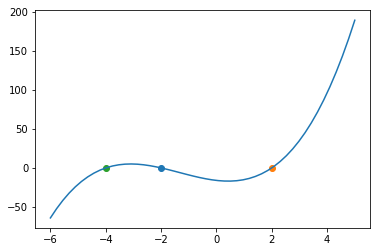

In [15]:
x=np.linspace(-6,5)
plt.plot(x,f(x))
plt.scatter(-2,f(-2))
plt.scatter(2,f(2))
plt.scatter(-4,f(-4))

De forma análitica ya podemos saber que sus raices son $x=-2, =2, x=-4$, no obstante con el fin de utilizar el metodo, lo que se utilizará es atraves de la gráfica hacer un estimado de la raiz, para el primer caso tomamos $x=2.1$ y hacemos 10 pasos y usamos para la derivada la derivada de la función de forma analitica.

$$f'(x) = 3x^2+8x-4$$

In [16]:
def derivada(x):
    return 3*x**2+8*x-4
x_0=2.1
x_k=x_0
for i in range(10):
    x_k = x_k - f(x_k)/derivada(x_k)
print(x_k)

2.0


como se esperaba obtuvimos la solucion análitica despues de tan sólo 10 pasos, esto se puede generalizar para que lo haga para los 3 punto, por ejemplo tomemos $x=2.1,x=-2.1,x=-4.1$ y veamos como cambiaria nustro codigo

In [17]:
x_0=np.array([2.1,-2.1,-4.1])
x_k=x_0
for i in range(10):
    x_k = x_k - f(x_k)/derivada(x_k)
print(x_k)

[ 2. -2. -4.]


Con lo cual se tiene que obtenemos la respuesta esperada

### Diferencias finitas

La idea de hallar un metodo por medio de diferencias finitas es intentar aproximar un función $f(x,t)$ a una función tal que esta sea solución a una ecuación diferncial por medio de lo que se conoce como una "diferencia finita", esta ecuación puede ser tanto parcial como una ecuación que dependa de tan sólo una variable. La idea es entonces discretizar el espacio con el fin de lograr hacer estas diferencias, punto a punto en el espacio.

De esta forma se discretiza el tiempo y el espacio. Esto se hace con el fin de lograr aproximar las derivadas de una función.
Primero se tiene:

$$f'(x)\approx \frac{f(x+h) - f(x)}{h}$$

Así por ejemplo para una funcion que depnda tanto de tiempo como del espacio se tiene que:
    $$f(x_j,t_n) \equiv u^n_j$$
Y por ende tenemos que haciendo un paso hacia adelante, la dieferncia de la función para este caso se puede aproximar como:
$$\frac{u^{n+1}_{j} -u^{n}_{j} }{k}=\frac{u_{j+1}^{n}-2u_{j}^{n}+u_{j-1}^{n}}{h^2} $$

# Ejercicio

Como ejemplo solucionaremos la ecuación de Burgers, la cual está dada por:

$${\frac {\partial u}{\partial t}}+u{\frac {\partial u}{\partial x}}=\nu {\frac {\partial ^{2}u}{\partial x^{2}}}.$$

Pero esta para un caso más sencillo puede ser paroximada como para el caso de una onda de choque como:
$$\displaystyle {\frac {\partial u}{\partial t}}+{\frac {1}{2}}{\frac {\partial u^{2}}{\partial x}}=0.$$

Para esto entonces tenemos que aproximar tanto las derivadas temporales como las espaciales. Esto se puede lograr viendo como cambian sus vecinos, para esto veamos que la solucion a esta ecuación se puede hacer de la siguente forma:

1) Definimos las condiciones iniciales de nuestro problema, para esto tomamos el problema unidimensional ( recuerde que la ecuación de burges es la solucion a una ecuación de una onda de choque que puede estar viajando en un medio cualquiera), entonces fijamos un $\Delta x = 0.005$ y un $\Delta t = 0.01$, luego fijamos la longitud de nuestro problema $L$ para este caso lo tamaremos como 6 de forma arbitraria.
acá inicializamos nuestra función como una funcion paso

2) definimos el movimiento dado por al segunda derivada, este se puede tomar como la mitad de su valor actual al cuadrado

In [20]:
 def Con_inicial(delta_x):
    L = 6.0
    N = L/delta_x + 1 # este será entonces el numero de puntos que tomaremos
    x = np.linspace(0.0, L, int(N))
    u = np.zeros(int(N))
    ii = x<3.0
    u[ii] = -1.0
    u[~ii] = 0.0
    return x, u

def flujo(u):
    return 0.5 * u**2

graficamos con el fin de ver si lo que estamos haciendo si está bien y así tenemos que:

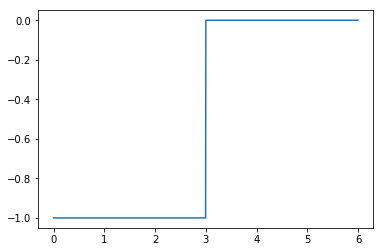

In [24]:
x,u = Con_inicial(0.005)
plt.plot(x,u)

solucionamos ahora el metodo como se planteó antes, para esto hacemos.

In [27]:
def Lax(u, t_max, delta_t, delta_x):
    N_t = int(t_max/delta_t)
    u_final = u.copy()
    for i in range(N_t):
        F = flujo(u)
        u_final[1:-1] = 0.5*(u[2:] + u[0:-2]) -  (0.5*delta_t/delta_x)*(F[2:] - F[0:-2]) 
        u = u_final.copy()
    return u_final

lo importante a notar acá es que se efectuan copias de u, esto se hace pues python por defecto al asignarle una variable esta se cambia por referencia y no por valor y es importante que durante las interaciones el valor de u no cambie sino hasta el final si se pasarapor referencia no se estaría haciendo de forma adecada el metodo.

Por ultimo visualizamos lo obtenido y esto lo hacemos para varios intervalos de tiempo

In [29]:
x, u_init = Con_inicial(0.005)
t_max_values = [0.0, 0.5, 1.0, 2.0,3.0,4.0]

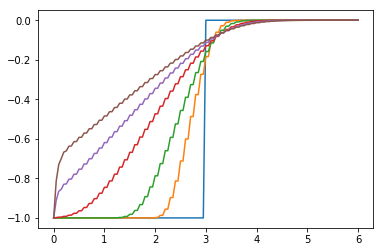

In [31]:
for t_max in t_max_values:
    delta_x = 0.05
    x, u_init = Con_inicial(delta_x)
    u_final = Lax(u_init, t_max=t_max,delta_t=0.5*delta_x, delta_x=delta_x)
    plt.plot(x, u_final)
plt.show()

Con la anterior figura se muestra entonces como evoluciona esta onda

## Ajuste de unos datos usando estadistica Bayesiana

Para hacer uso del siguiente algoritmo es necesario sólo tener conocimientos basicos de probabilidad

Suponga que se tienen unos datos  y se quiere ajustar estos datos a una función. Una de las mejores formas de ajustar estos datos es haciendo uso de la estadistica bayesiana. Con lo cual se usa un algoritmo llamado Metropolis Hastings, este algoritmo se basa simplemente en encontrar la distribución de unos puntos por medio de un muestreo aleatorio y unas reglas de selección.
Suponga que los puntos a los que queremos ajustar son los siguientes:

<ErrorbarContainer object of 3 artists>

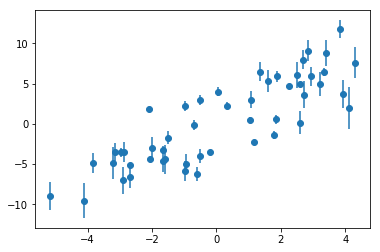

In [47]:
x= np.linspace(-4,4) + np.random.normal(0,1,50)
y= 2. *np.linspace(-4,4) + np.random.normal(0,2,50)
y_err = 0.5 * np.linspace(-4,4) + np.random.normal(0,0.5,50)
plt.errorbar(x,y, yerr=y_err, fmt='o')


Los puntos anteriores fueron generados de manera aleatoria con errores aleatorios, pero sabemos que estos deberían venir de una función parecida a algo como $y=2x$
Partimos entonces de que existe una distribución que siguen estos puntos que estan distribuidos, la cual se define como

$$
\mathcal{L}({x_i, y_i, \sigma_i}|m, b) = \prod_{i=1}^{N}\exp\left[-\frac{1}{2}\left(\frac{y_i - y_{model}(x_i, m, b)}{\sigma_i}\right)^2\right]
$$

así de esta forma tenemos que proponemos un modelo y luego testeamos con esta función de "verosimilitud", con el fin de usar este metodo se debe dar un estimado de forma manual de donde se cree que los parámetros estarán y así de esta forma se supone una distribución uniforme para los parametros ( esto no afecta mucho, lo único que cambia esto es en la convergencia de nuestro metodo, aveces no sea mejor usar esto si no otro "approach" pero por ahora este funciona bastante bien)

In [49]:
def model(x,m,b):
    return x*m + b

def loglikelihood(x_obs, y_obs, sigma_y_obs, m, b):
    d = y_obs -  model(x_obs, m, b)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    return d

def logprior(m, b):
    p = -np.inf
    if m < 10 and m >-10 and b >-20 and b<20:
        p = 0.0
    return p

Hacemos entonces el metodo montecarlo de metropolis hastings, el cual consite en proponer numeros y ver si el cociente entre las funciones evaluadas en este punto es menor o no que un valor minimo que se pone acá como 1 ( esto para asegurar convergencia), de esta forma generamos puntos de forma aleatoria tanto para $m$ como para $b$ y hacemos este procedimiento 50000 veces para tener convergencia

In [60]:
N = 50000
lista_m = [np.random.random()]
lista_b = [np.random.random()]
logposterior = [loglikelihood(x_obs, y_obs, sigma_y_obs, lista_m[0], lista_b[0]) + logprior(lista_m[0], lista_b[0])]

sigma_delta_m = 0.1 # se suponen estos sigmas pero en principio podrian ser otros arbitrarios ( estos funcionan)
sigma_delta_b = 1.0

for i in range(1,N):
    propuesta_m  = lista_m[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_m)
    propuesta_b  = lista_b[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b)

    logposterior_viejo = loglikelihood(x_obs, y_obs, sigma_y_obs, lista_m[i-1], lista_b[i-1]) + logprior(lista_m[i-1], lista_b[i-1])
    logposterior_nuevo = loglikelihood(x_obs, y_obs, sigma_y_obs, propuesta_m, propuesta_b) + logprior(propuesta_m, propuesta_b)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_m.append(propuesta_m)
        lista_b.append(propuesta_b)
        logposterior.append(logposterior_nuevo)
    else:
        lista_m.append(lista_m[i-1])
        lista_b.append(lista_b[i-1])
        logposterior.append(logposterior_viejo)
lista_m = np.array(lista_m)
lista_b = np.array(lista_b)
logposterior = np.array(logposterior)

Graficamos nuestros resultados para ver cuales fueron entonces nuestros valores de $b$ y $m$ despues del metodo

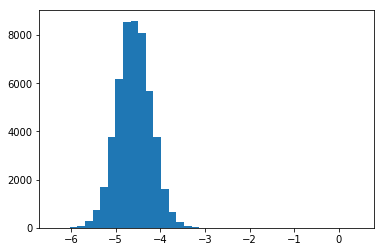

In [61]:
primero=plt.hist(lista_b, bins=40)

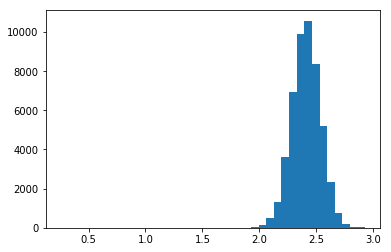

In [62]:
segundo=plt.hist(lista_m, bins=40)


de la información anterior se toma entonces el valor más probable "el valor esperado". así nuestro modelo llevara el b mas probable y el m más probable.

 los valores de la pendiente y el punto de corte dados por el metodo son:  2.409220506248045 -4.5887776529058195


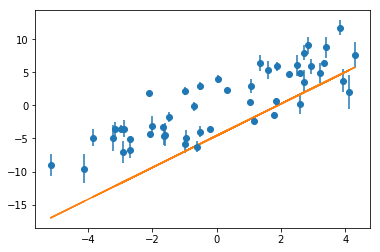

In [65]:
y_model = model(x,np.mean(lista_m),np.mean(lista_b))
plt.errorbar(x,y, yerr=y_err, fmt='o')
plt.plot(x, y_model)
print(" los valores de la pendiente y el punto de corte dados por el metodo son: ",np.mean(lista_m),np.mean(lista_b))

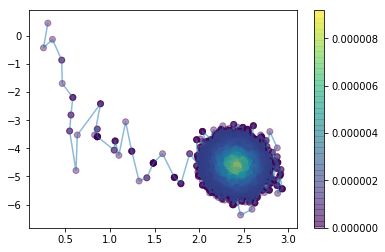

In [64]:
Así de esta forma hemos hallado la recta que mejor se ajusta a los datos esperados